# Used Bike Price prediction with Linear Regression

# Importing Libraries

In [2]:
library(tidyverse, help, pos = 2, lib.loc = NULL)
library(dplyr, help, pos = 2, lib.loc = NULL)
library(ggplot2, help, pos = 2, lib.loc = NULL)
library(dplyr)
library(modelr)
library(caret)
library(caTools)
library(leaps)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




# Reading Dataset

In [3]:
df <- readr::read_csv("data.csv")

New names:
• `` -> `...1`
Rows: 7857 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): owner, brand, city
dbl (8): ...1, kms_driven, mileage, power, engine, age, city_tier, price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Data Description

In [4]:
head(df)

...1,kms_driven,owner,mileage,power,brand,engine,age,city,city_tier,price
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
0,17000,1,35,19.0,Bajaj,NA,5,Hyderabad,1,63500
1,50000,1,35,19.8,Royal,350,6,Hyderabad,1,115000
2,14795,1,30,28.0,Hyosung,NA,10,Hyderabad,1,300000
3,NA,1,NA,34.5,Bajaj,NA,5,Pondicherry,3,100000
4,2000,1,NA,30.0,Jawa,330,2,Bangalore,1,197500
5,24561,3,35,25.0,KTM,200,10,Bangalore,1,63400


In [5]:
summary(df)

      ...1        kms_driven         owner              mileage      
 Min.   :   0   Min.   :      0   Length:7857        Min.   :  5.00  
 1st Qu.:1964   1st Qu.:   8903   Class :character   1st Qu.: 35.00  
 Median :3928   Median :  17000   Mode  :character   Median : 40.00  
 Mean   :3928   Mean   :  23090                      Mean   : 45.07  
 3rd Qu.:5892   3rd Qu.:  30000                      3rd Qu.: 58.00  
 Max.   :7856   Max.   :1000000                      Max.   :104.00  
                NA's   :1988                         NA's   :974     
     power           brand               engine          age        
 Min.   :  7.00   Length:7857        Min.   : 100   Min.   : 1.000  
 1st Qu.: 14.20   Class :character   1st Qu.: 150   1st Qu.: 4.000  
 Median : 19.00   Mode  :character   Median : 180   Median : 6.000  
 Mean   : 21.17                      Mean   : 239   Mean   : 6.632  
 3rd Qu.: 24.50                      3rd Qu.: 350   3rd Qu.: 8.000  
 Max.   :197.30           

In [6]:
str(df)

spec_tbl_df [7,857 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1      : num [1:7857] 0 1 2 3 4 5 6 7 8 9 ...
 $ kms_driven: num [1:7857] 17000 50000 14795 NA 2000 ...
 $ owner     : chr [1:7857] "1" "1" "1" "1" ...
 $ mileage   : num [1:7857] 35 35 30 NA NA 35 65 40 25 58 ...
 $ power     : num [1:7857] 19 19.8 28 34.5 30 ...
 $ brand     : chr [1:7857] "Bajaj" "Royal" "Hyosung" "Bajaj" ...
 $ engine    : num [1:7857] NA 350 NA NA 330 200 180 NA 390 150 ...
 $ age       : num [1:7857] 5 6 10 5 2 10 6 2 4 8 ...
 $ city      : chr [1:7857] "Hyderabad" "Hyderabad" "Hyderabad" "Pondicherry" ...
 $ city_tier : num [1:7857] 1 1 1 3 1 1 1 1 2 1 ...
 $ price     : num [1:7857] 63500 115000 300000 100000 197500 ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   kms_driven = col_double(),
  ..   owner = col_character(),
  ..   mileage = col_double(),
  ..   power = col_double(),
  ..   brand = col_character(),
  ..   engine = col_double(),
  ..   age = col_double(),
  

# Cleaning Data

Removing Duplicates

In [7]:
df <- df[!duplicated(df), ]

Dropping Column

In [8]:
df <- subset (df, select = -c(...1))

In [9]:
df <- transform(df, owner = as.integer(owner))

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”


In [10]:
head(df)

,kms_driven,owner,mileage,power,brand,engine,age,city,city_tier,price
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,17000,1,35,19.0,Bajaj,NA,5,Hyderabad,1,63500
2,50000,1,35,19.8,Royal,350,6,Hyderabad,1,115000
3,14795,1,30,28.0,Hyosung,NA,10,Hyderabad,1,300000
4,NA,1,NA,34.5,Bajaj,NA,5,Pondicherry,3,100000
5,2000,1,NA,30.0,Jawa,330,2,Bangalore,1,197500
6,24561,3,35,25.0,KTM,200,10,Bangalore,1,63400


# EDA

In [11]:
ndf <- subset(df, select = -c(brand, city))
ndf <- na.omit(ndf)
head(ndf)

,kms_driven,owner,mileage,power,engine,age,city_tier,price
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,50000,1,35,19.8,350,6,1,115000
6,24561,3,35,25.0,200,10,1,63400
7,19718,1,65,17.0,180,6,1,55000
9,1350,1,25,42.9,390,4,2,198000
11,25000,1,35,19.8,350,4,1,136900
12,26240,1,32,24.5,410,6,2,112000


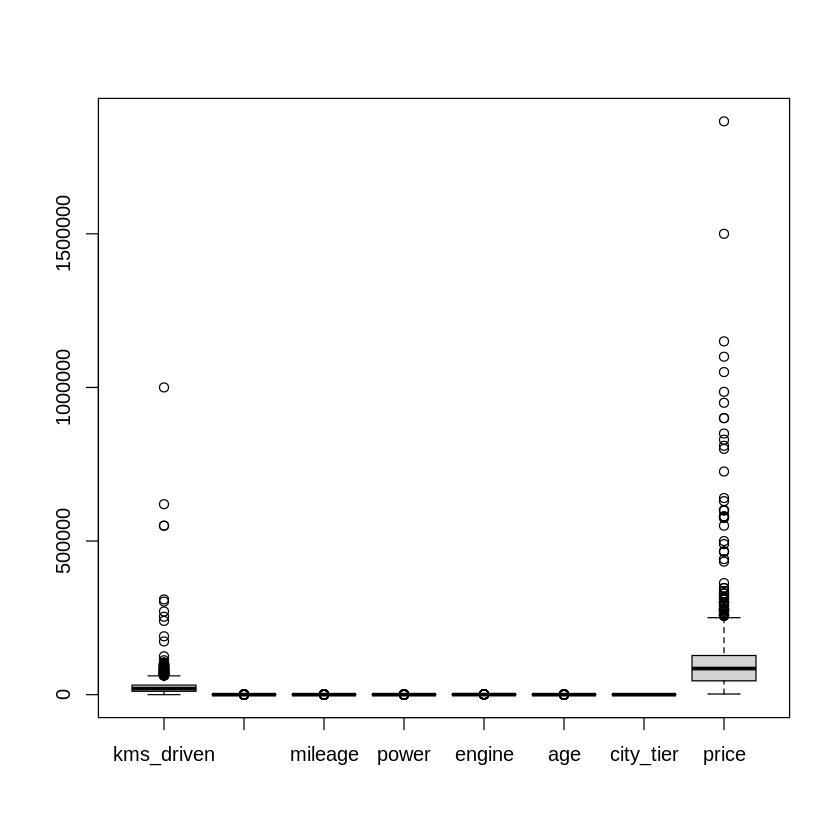

In [12]:
boxplot(ndf)

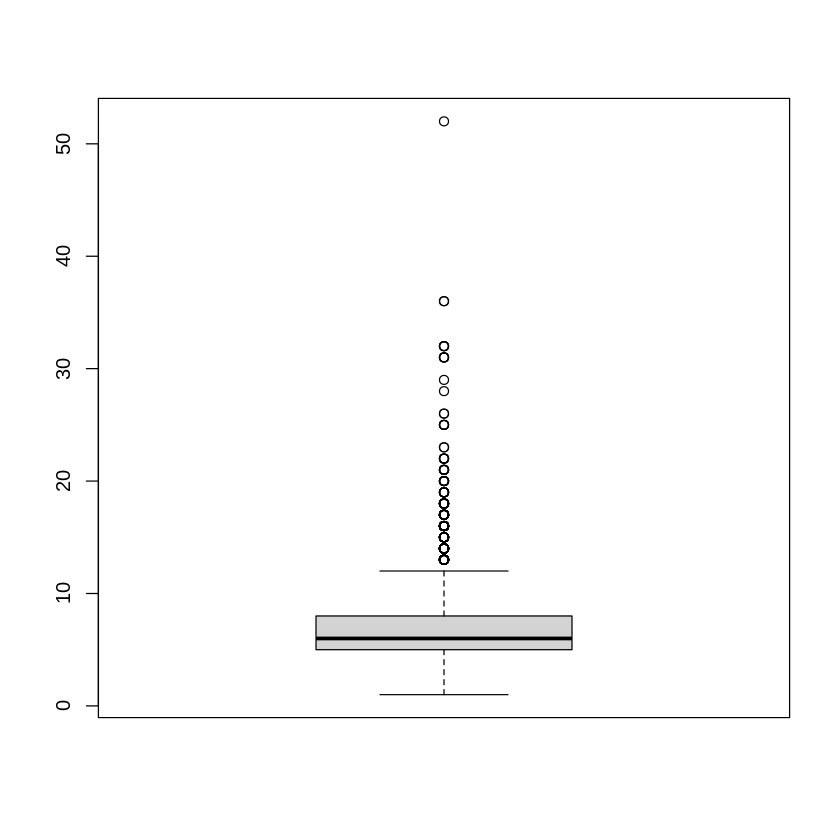

In [13]:

boxplot(ndf$age)

In [14]:
ndf <- filter(ndf, age < 16)

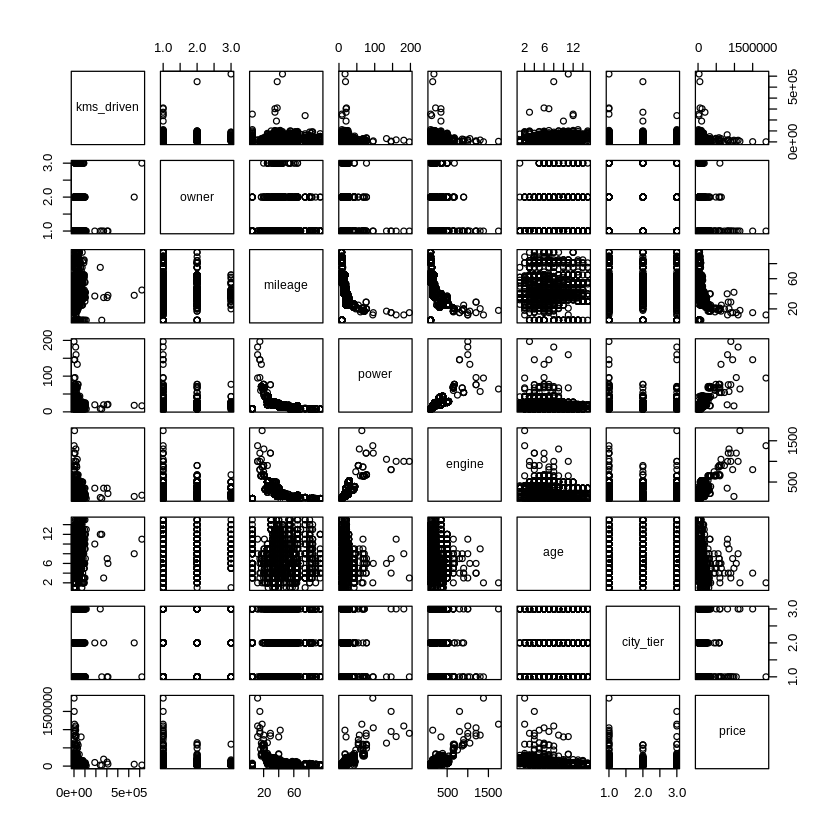

In [15]:
pairs(ndf)

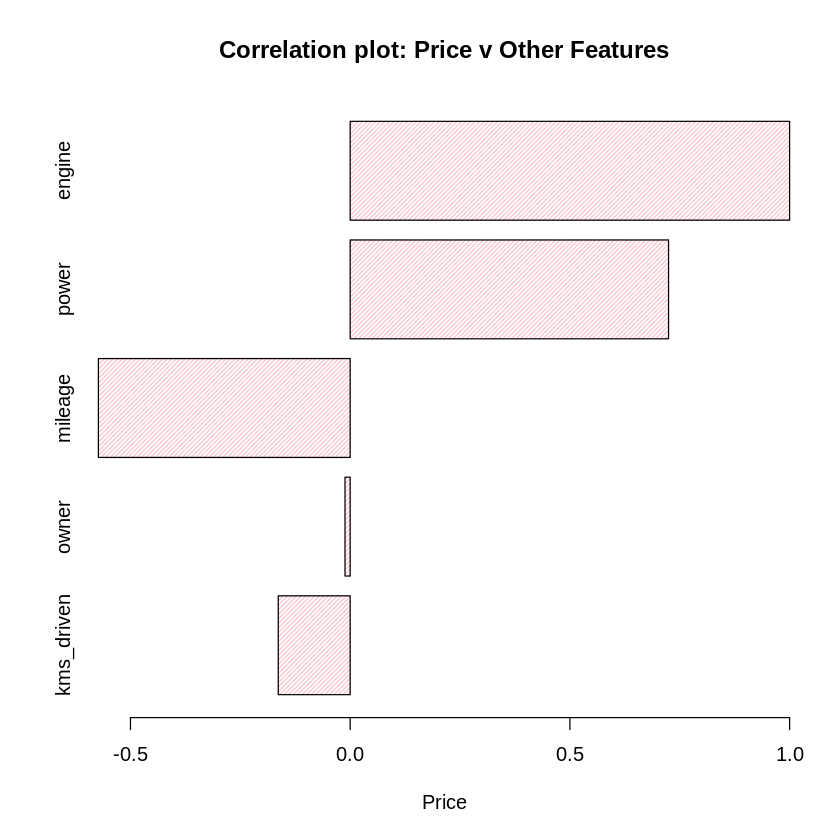

In [16]:

cr <- cor(ndf)
barplot(cr[5, 0:5], horiz = TRUE, col = "pink",density = 40, border = "black",
main = "Correlation plot: Price v Other Features", xlab = "Price")

### Inference:
 1. We can conclude that power, mileage and engine is highly correlated with price of the vehicle, thus power(cc) of the vehicle is directly propotional to the price of the vehicle.
 2. Age and Kms also contribute in calucating the price of the vehicle, they are inversely propotional to the price.

# PCA

In [17]:
results <- prcomp(ndf[1:7], scale = TRUE)
results$rotation <- -1 * results$rotation
results$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
kms_driven,0.23256324,-0.5601126,0.018468900,-0.34902914,0.71324608,0.02849489,0.022222283
owner,0.04151956,-0.4902935,0.040546561,0.86855542,0.02379470,0.01515403,0.032558218
mileage,0.50297361,0.2041718,-0.024145217,0.10041711,0.07546444,-0.82243810,0.112096026
power,-0.56434033,-0.1437527,-0.054026256,-0.02166455,0.10090441,-0.46235771,-0.658415222
engine,-0.57765244,-0.1430310,-0.048153078,-0.07441978,0.02940584,-0.29252935,0.742673977
age,0.19035710,-0.6021320,0.003472542,-0.32679335,-0.68844980,-0.14010141,-0.028350669
city_tier,0.05300782,-0.0226801,-0.996083466,0.03008317,0.00306944,0.05981205,-0.001269789


[1] 0.33043066 0.19849253 0.14256997 0.12490624 0.09311799 0.07189758 0.03858504

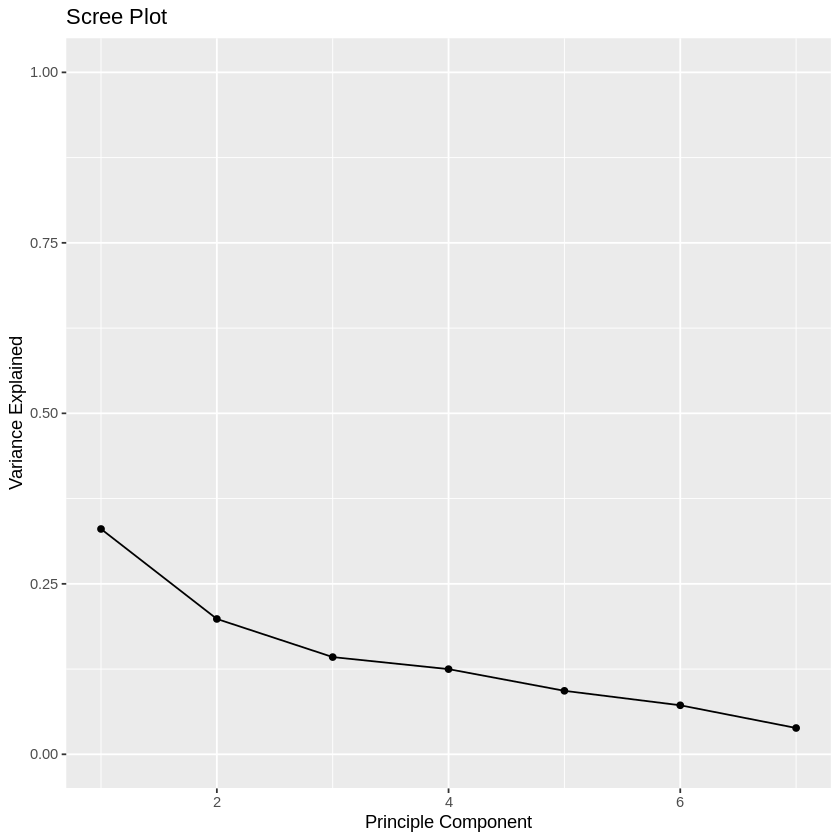

In [18]:
var_explained <- results$sdev^2 / sum(results$sdev^2)
qplot(c(1:7), var_explained) +
geom_line() +
xlab("Principle Component") +
ylab("Variance Explained") +
ggtitle("Scree Plot") +
ylim(0, 1)
var_explained

In [29]:
summary(results)
fviz_eig(results)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5    PC6     PC7
Standard deviation     1.5209 1.1787 0.9990 0.9351 0.80736 0.7094 0.51971
Proportion of Variance 0.3304 0.1985 0.1426 0.1249 0.09312 0.0719 0.03859
Cumulative Proportion  0.3304 0.5289 0.6715 0.7964 0.88952 0.9614 1.00000

ERROR: Error in fviz_eig(results): could not find function "fviz_eig"


### Inference:
PCA does not help in incrasing the accuracy of the model

# Modeling

In [19]:
BER <- regsubsets(price~.,data=ndf,method="backward")
Modelsummary <- cbind(summary(BER)$which,R2=summary(BER)$rsq,SSres=summary(BER)$rss,AdjR2=summary(BER)$adjr2,Cp=summary(BER)$cp,BIC=summary(BER)$bic)
Modelsummary

,(Intercept),kms_driven,owner,mileage,power,engine,age,city_tier,R2,SSres,AdjR2,Cp,BIC
1,1,0,0,0,1,0,0,0,0.5947511,1.115102e+13,0.5946380,1210.091457,-3222.699
2,1,0,0,0,1,0,1,0,0.6626668,9.282214e+12,0.6624785,408.983982,-3872.295
3,1,0,0,0,1,1,1,0,0.6936080,8.430822e+12,0.6933514,45.102343,-4209.105
4,1,0,0,1,1,1,1,0,0.6957561,8.371715e+12,0.6954163,21.701303,-4226.149
5,1,0,1,1,1,1,1,0,0.6970189,8.336966e+12,0.6965958,8.768307,-4232.880
6,1,0,1,1,1,1,1,1,0.6972693,8.330077e+12,0.6967618,7.807588,-4227.660
7,1,1,1,1,1,1,1,1,0.6974222,8.325870e+12,0.6968302,8.000000,-4221.286


#### Splitting data into Train and Test

In [20]:

split <- sample.split(ndf$price, SplitRatio = 0.7)
trainingset <- subset(ndf, split == TRUE)
testset <- subset(ndf, split == FALSE)

#### Linear Regression model

In [21]:
model1 <- lm(formula = price ~ ., data = trainingset)
ypred <- predict(model1, newdata = testset)

#### Checking Acuuracy

In [22]:

data.frame(
  R2.train = rsquare(model1, data = trainingset),
  RMSE.train = rmse(model1, data = trainingset),
  MAE.train = mae(model1, data = trainingset),
  R2.test = rsquare(model1, data = testset),
  RMSE.test = rmse(model1, data = testset),
  MAE.test = mae(model1, data = testset)
)

R2.train,RMSE.train,MAE.train,R2.test,RMSE.test,MAE.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6935233,52287.81,27321.63,0.7005089,35010.94,24618.03


#### Accuracy: Train = 69%, Test = 72%

In [23]:
saveRDS(model1, "LM.rds")





# Thank You. Jai Sairam